<a href="https://colab.research.google.com/github/VedvratGautam/Learning-Machines/blob/main/EDA_Book_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data

In [2]:
df = pd.read_csv('/content/Books_Data_Clean.csv')

Starting Exploratory Data Analysis

In [3]:
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [4]:
#Getting statistical analysis

df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [5]:
#Fixing negative min value of publishing year

df  = df[df["Publishing Year"] >1800]

In [6]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,537.032381,1989.703810,4.009419,94723.344762,1855.259381,844.808280,4.889524,614.719048,9709.083810
std,309.470443,34.076973,0.247090,31523.050620,3948.841694,2266.203156,3.572709,370.425543,15365.222464
min,0.000000,1812.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,269.250000,1986.000000,3.850000,70285.500000,370.882500,0.000000,1.990000,289.250000,577.500000
50%,538.500000,2003.000000,4.020000,88940.000000,809.745000,276.609000,3.990000,600.500000,3942.000000
75%,804.750000,2010.000000,4.170000,113523.750000,1486.025000,721.180500,7.102500,937.750000,5346.000000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [7]:
#Checking if NA value rows exist

df.isna().sum()

,0
index,0
Publishing Year,0
Book Name,21
Author,0
language_code,50
Author_Rating,0
Book_average_rating,0
Book_ratings_count,0
genre,0
gross sales,0


NA value rows for language_code were not removed because features with NA values might still contain more important information in their rows

In [8]:
#Dropping rows with NA values in "Book Name" feature

df.dropna(subset = ['Book Name'], inplace = True)

In [9]:
#Checking for duplicated rows

df.duplicated().sum()

np.int64(0)

In [10]:
#Checking unique entries for each feature

df.nunique()

,0
index,1029
Publishing Year,131
Book Name,1027
Author,708
language_code,8
Author_Rating,4
Book_average_rating,133
Book_ratings_count,1023
genre,4
gross sales,798


Visualizing Data

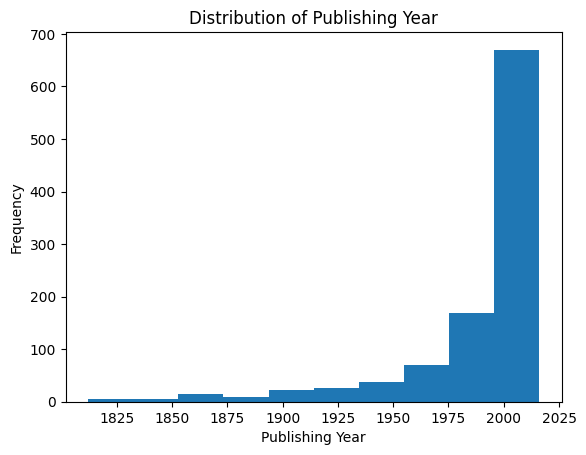

In [11]:
#Making histogram of publishing year

plt.hist(df['Publishing Year'])

plt.xlabel('Publishing Year')
plt.ylabel('Frequency')
plt.title('Distribution of Publishing Year')

plt.show()

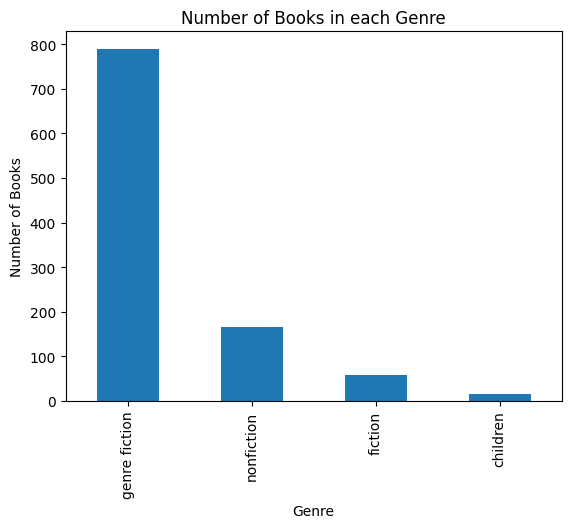

In [12]:
#Representing number of books in each genre

df['genre'].value_counts().plot(kind = 'bar')

plt.xlabel('Genre')
plt.ylabel('Number of Books')
plt.title('Number of Books in each Genre')

plt.show()

In [13]:
#Calculating average rating of each Author (Best to Least)

df.groupby('Author')['Book_average_rating'].mean().sort_values(ascending=False)

,Book_average_rating
Author,
Bill Watterson,4.650
"Bill Watterson, G.B. Trudeau",4.610
J.R.R. Tolkien,4.590
George R.R. Martin,4.560
Sarah J. Maas,4.526
...,...
Audrey Niffenegger,3.230
"Herman Koch, Sam Garrett",3.220
P.D. James,3.210


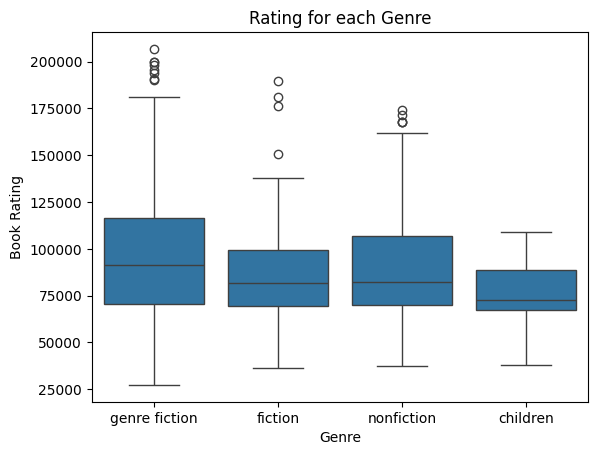

In [14]:
#Seeing if some genres are highly rated than others

sns.boxplot(x = 'genre' , y = 'Book_ratings_count', data=df)

plt.xlabel('Genre')
plt.ylabel('Book Rating')
plt.title('Rating for each Genre')

plt.show()

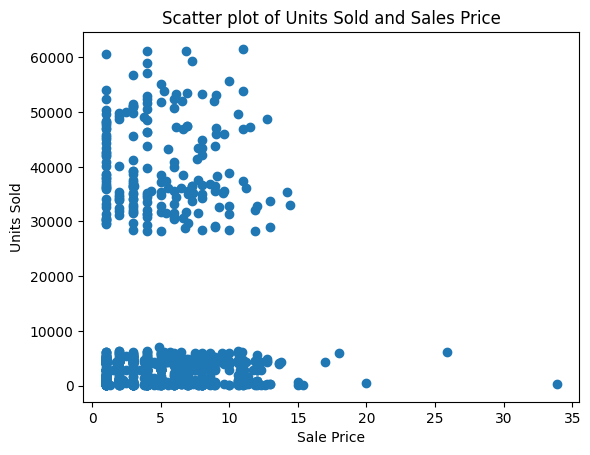

In [15]:
#Creating scatterplot to see relation b/w units sold and price

plt.scatter(df['sale price'], df['units sold'])

plt.xlabel('Sale Price')
plt.ylabel('Units Sold')
plt.title('Scatter plot of Units Sold and Sales Price')

plt.show()

In [16]:
#Getting msot common languages

language_counts = df['language_code'].value_counts()

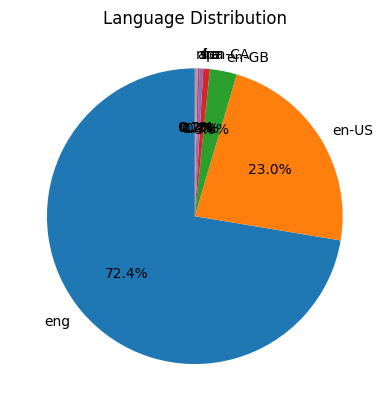

In [17]:
plt.pie(language_counts, labels = language_counts.index, startangle=90, autopct='%1.1f%%' )

plt.title('Language Distribution')
plt.show()

In [18]:
#Calculating revenue for publisher

df.groupby('Publisher ')['publisher revenue'].sum().sort_values(ascending = False)

,publisher revenue
Publisher,
Penguin Group (USA) LLC,200581.794
Random House LLC,178797.222
"Amazon Digital Services, Inc.",143856.000
HarperCollins Publishers,125983.302
Hachette Book Group,125146.842
Simon and Schuster Digital Sales Inc,46988.352
Macmillan,32356.236
HarperCollins Publishing,2830.806
HarperCollins Christian Publishing,2135.670


In [19]:
#Seeing relation b/w author rating and book rating count

df.groupby('Author_Rating')['Book_ratings_count'].mean().sort_values(ascending= False)

,Book_ratings_count
Author_Rating,
Intermediate,101449.635762
Famous,98529.102041
Novice,86667.758621
Excellent,83283.994236


In [20]:
#Counting number of books in each language

df.groupby('language_code').size().sort_values(ascending= False)

,0
language_code,
eng,710
en-US,226
en-GB,29
en-CA,7
fre,4
ara,2
spa,2
nl,1


In [21]:
df.columns

Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

In [26]:
df.groupby('Author_Rating')['Book_ratings_count'].var().sort_values(ascending= False)

,Book_ratings_count
Author_Rating,
Famous,1.204660e+09
Intermediate,1.166913e+09
Novice,9.305835e+08
Excellent,4.430502e+08


Text(0.5, 1.0, 'Scatter Plot of Average Book rating vs Book Ratings Count')

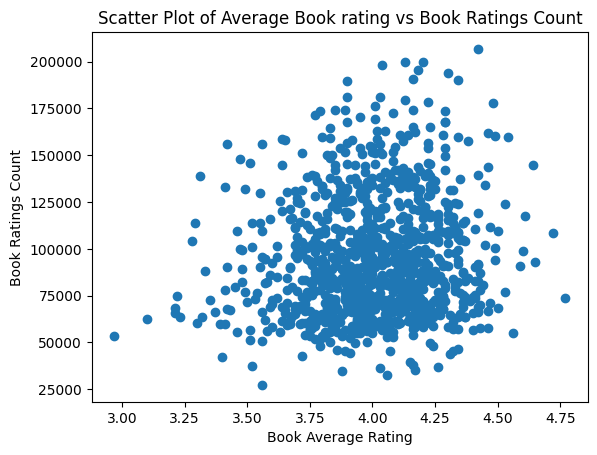

In [27]:
plt.scatter(df['Book_average_rating'] , df['Book_ratings_count'])

plt.xlabel('Book Average Rating')
plt.ylabel('Book Ratings Count')
plt.title('Scatter Plot of Average Book rating vs Book Ratings Count')


In [30]:
total_gross_sales_by_author = df.groupby('Author')['gross sales'].sum()

Text(0.5, 1.0, 'Sales trend among best selling authors')

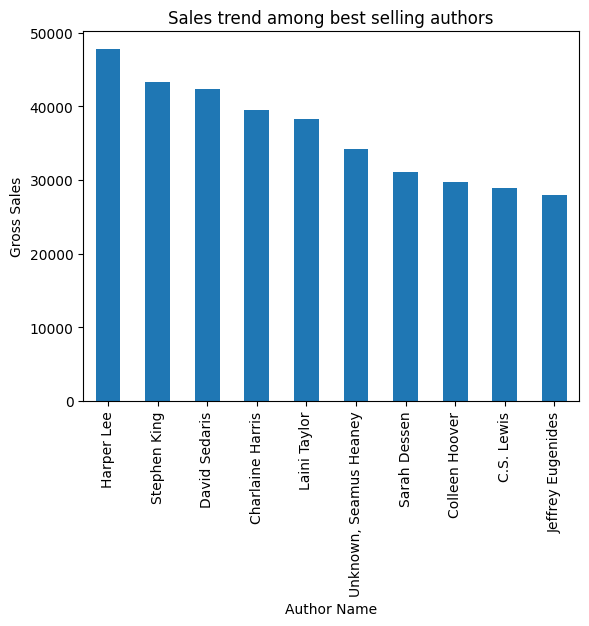

In [37]:
#Total Sales per author

total_gross_sales_by_author.sort_values(ascending= False).head(10).plot(kind = 'bar')

plt.xlabel('Author Name')
plt.ylabel('Gross Sales')
plt.title('Sales trend among best selling authors')

Text(0.5, 1.0, 'Books sold based on Author rating')

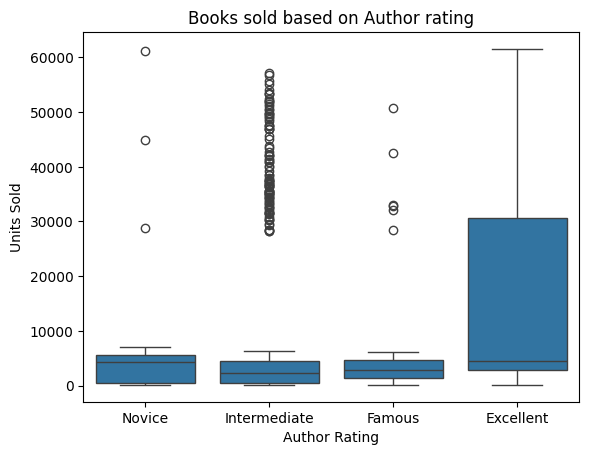

In [39]:
sns.boxplot(x='Author_Rating' , y='units sold', data= df)

plt.xlabel('Author Rating')
plt.ylabel('Units Sold')
plt.title('Books sold based on Author rating')


In [48]:
a = df.groupby('Publishing Year')['units sold'].sum()

Text(0.5, 1.0, 'Books sold vs Publishing Year')

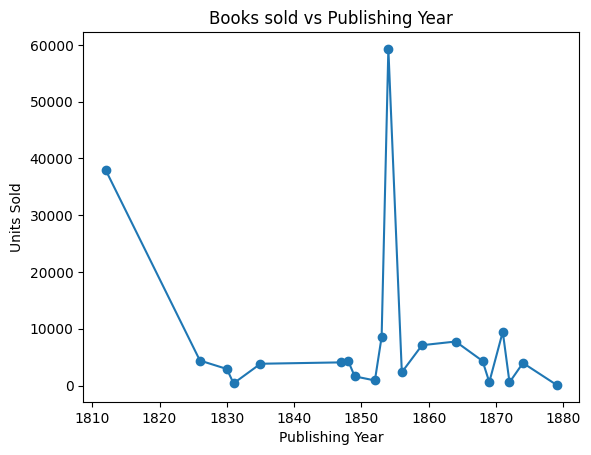

In [52]:
#Publishing year and books sold trend for 1800's

a.head(20).plot(kind = 'line' , marker = 'o')
plt.xlabel('Publishing Year')
plt.ylabel('Units Sold')
plt.title('Books sold vs Publishing Year')